# General Feature Exploration

Exploratory Data Analysis of features that don't really belong to any specific category. We group these features together under the 'General' name. 

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,0,0,0,1,0,0,NaN,0.0,1,83.783784
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,0,0,0,0,0,1,NaN,NaN,1,71.428571
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,58.823529
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,0,0,0,0,1,0,NaN,0.0,2,81.818182
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.2,5,87.500000


### 'Day' Feature Exploration

Our initial goal is to use the data available to predict the number of goals scored. We can start by exploring the relationships between each of the features and goals scored. We start off by looking at the relationship between the 'Day' feature and the 'Goals' feature. 

In [4]:
att_explore['Day'].unique()

array(['Sun', 'Sat', 'Mon', 'Wed', 'Fri', 'Tue', 'Thu'], dtype=object)

In [5]:
att_explore['Day'].value_counts()

Day
Sat    15336
Sun     8120
Wed     2752
Tue     1835
Mon     1790
Thu     1016
Fri      888
Name: count, dtype: int64

In [6]:
goals_by_day = att_explore.groupby(['Day', 'Goals']).size().unstack(fill_value = 0)

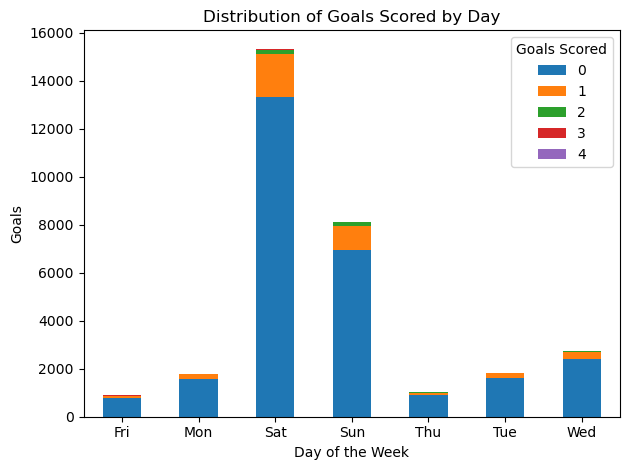

In [7]:
fig, ax = plt.subplots()

goals_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

First of all, we can see that majority of the games are played on either a Saturday or a Sunday which makes sense. Although it may appear that Saturdays and Sundays have a greater proportion of goals scored, this is not the case. It only appears that way because the Sat/Sun bar is quite a bit longer. This is made evident if we produce a similar plot, but this time we plot the proportion of the number of goals scored each day. 

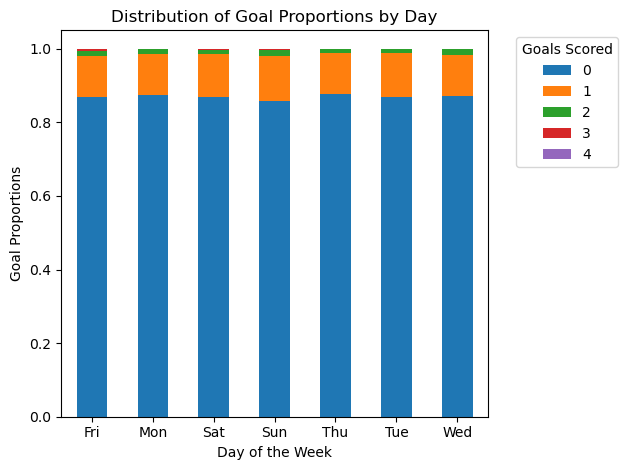

In [8]:
goalprop_by_day = goals_by_day.div(goals_by_day.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_day.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it clear that the proportion of goals scored does not really differ across the days. In other words, it doesn't appear that there is any relation between the number of goals scored, and the day the game was played. Another thing we can do to further investigate this is to group the observations by whether or not the game was played on a weekend, or on a weekday. In general, weekend games are much more common, as midweek games only happen in special circumstances such as rearranged fixtures or double gameweeks. Perhaps there is a difference in the number of goals scored when grouping the data in this manner. 

In [9]:
def categorize_day(day):
    if day in ['Sat', 'Sun']:
        return 'Weekend'
    else:
        return 'Weekday'

goalprop_by_daytype = att_explore[['Day', 'Goals']]


/var/folders/dv/bjx4hkg54x17symh1g3_3jf80000gq/T/ipykernel_25289/1867152727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)


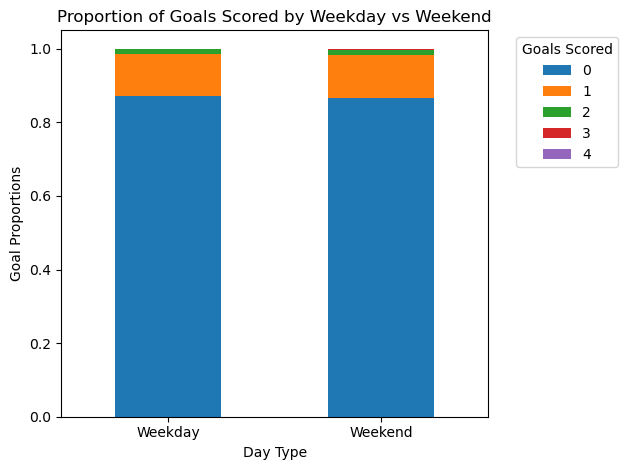

In [10]:
goalprop_by_daytype['DayType'] = goalprop_by_daytype['Day'].apply(categorize_day)

goals_by_daytype = goalprop_by_daytype.groupby(['DayType', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_daytype = goals_by_daytype.div(goals_by_daytype.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()
goalprop_by_daytype.plot(kind = 'bar', stacked = True, ax = ax)

ax.set_title('Proportion of Goals Scored by Weekday vs Weekend')
ax.set_xlabel('Day Type')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Once again, we can see that the proportion of goals scored by day type is essentially identical. Therefore, there is strong justification to say that the day the game was played does not have any impact on the number of goals scored. If building a model to predict the number of goals scored, we can remove this feature from consideration. 

### 'Matchweek' Feature Exploration

We now have a look at the relationship between goals scored and the matchweek where the game occurred. We don't anticipate there to be much relationship between this feature and the target variable. This is primarily for two reasons. The first reason is that the matchweek isn't necessarily representative of the order in which the games were played in. For example, rearranged games will keep their initial matchweek number (which is the original order of the fixtures when published at the beginning of the season), but may be played in non-consecutive order (so if the matchweek 5 game was rearranged to be played in February instead of September, it will still be classified as matchweek 5). Therefore, the only information that the 'Matchweek' feature is telling us is the initial fixture order. 

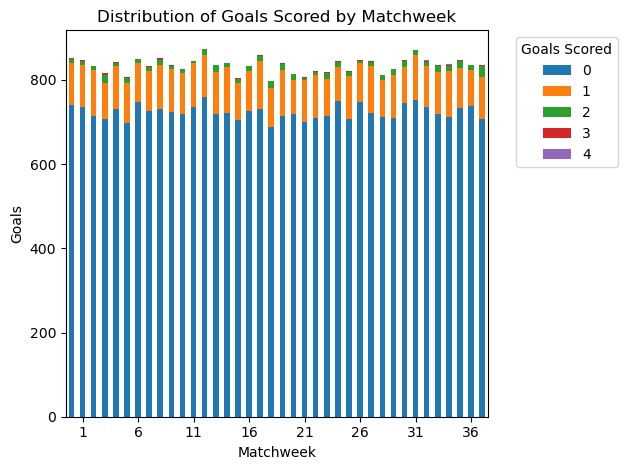

In [11]:
goals_by_matchweek = att_explore.groupby(['Matchweek', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_matchweek.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Matchweek')
ax.set_xlabel('Matchweek')

#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 38, 5))
ax.set_xticklabels(range(1, 38, 5))

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

As expected, there doesn't seem to be any particular relationship betweeen the number of goals scored and the matchweek. As there is no real logical way to categorise or transform the 'Matchweek' feature, we can conclude that this is another feature that is under strong consideration to be removed. 

### 'Venue' Feature Exploration

Our initial expectation is that there may be a relationship between the venue (whether or not the game was played home or away), and the number of goals scored. Typically, we expect teams (and therefore players) to perform better and score more goals when playing at home. Therefore, we expect to see a higher proportion of goals scored for observations that are categorised as playing at home. 

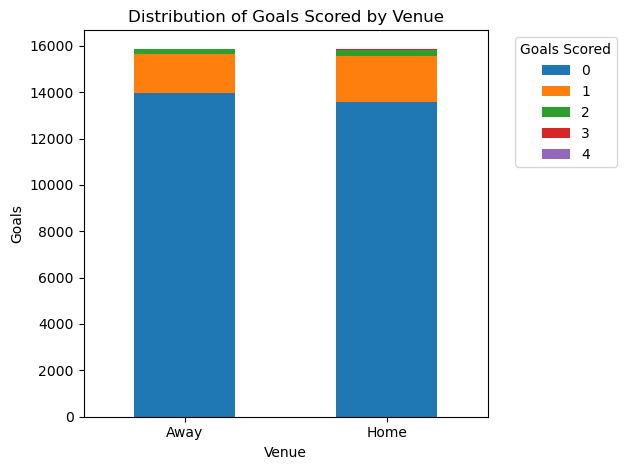

In [12]:
goals_by_venue = att_explore.groupby(['Venue', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_venue.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Venue')
ax.set_xlabel('Venue')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Perhaps surprisingly, we are not seeing any major difference between the number of goals scored at home compared to away from home. The plot does show that slightly more goals are scored at home compared to away, but this difference is perhaps not as pronounced as expected. 

### 'Result' Feature Exploration

In [13]:
att_explore['Result']

0        L 1–2
1        L 1–2
2        D 0–0
3        D 2–2
4        W 5–0
         ...  
31732    L 0–2
31733    W 3–0
31734    L 1–4
31735    L 0–4
31736    D 1–1
Name: Result, Length: 31737, dtype: object

We can see that the 'Result' feature is currently a dtype object, with information for both the final score (number of goals scored for each team), as well as the final result (win, loss or draw) in the same feature. We want to perhaps separate this feature, so that we can individually explore the relationship between goals scored and the final score/final result. 

In [14]:
#create new dataframe with just result and goals 
att_explore_result = att_explore[['Result', 'Goals']].copy()

#strip the result column of any whitespace, to make it easier to process the string 
att_explore_result.loc[:, 'Result'] = att_explore_result['Result'].str.strip()

#use str.extract method to extract the relevant strings from the result column. the purpose of this is to create two new features (outcome and score)
att_explore_result[['Outcome', 'Score']] = att_explore_result['Result'].str.extract(r'([LWD])\s+(\d+[–-]\d+)')

#drop the result column, as we no longer need this 
att_explore_result = att_explore_result.drop('Result', axis = 1)

#replace the dash in the score column with a hyphen, to make it easier to work with in the future 
att_explore_result['Score'] = att_explore_result['Score'].str.replace('\u2013', '-', regex = True)

att_explore_result.head()

,Goals,Outcome,Score
0,0,L,1-2
1,0,L,1-2
2,0,D,0-0
3,0,D,2-2
4,0,W,5-0


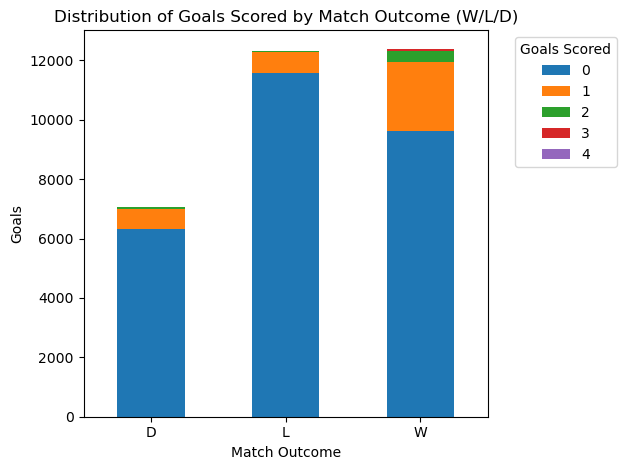

In [15]:
goals_by_outcome = att_explore_result.groupby(['Outcome', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Match Outcome (W/L/D)')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

It is perhaps unsurprising to see that the proportion of goals scored seems to be highest when the match outcome is a Win, compared to when the match outcome is either a Loss or a Draw. We can take a look further at the proportion of goals scored, when categorised by the match outcome. 

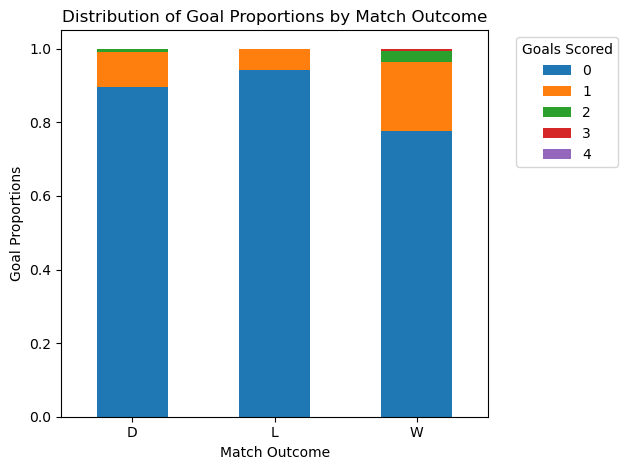

In [16]:
goalprop_by_outcome = goals_by_outcome.div(goals_by_outcome.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_outcome.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Match Outcome')
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

This plot makes it even more obvious that the proportion of goals scored is highest when the final outcome is a win. THe lowest proportion of goals scored is when the final outcome is a loss, whilst the proportion of goals scored is in the middle if the final outcome is a draw. Whilst this is useful to know, it doesn't really help with building a model to predict the number of goals scored, as this information is only available 'after' a game has been played. However, it may still be useful to include in the model, because we can then incorporate team strength models to aid with the prediction, i.e. feed into the model the probability that a team will win a particular game (as this will be known prior to the game), and using that to adjust the predictions. 

In [17]:
att_explore_result['Score'].unique()

array(['1-2', '0-0', '2-2', '5-0', '4-1', '3-6', '1-0', '0-3', '0-1',
       '0-4', '2-1', '3-0', '1-1', '3-1', '1-3', '2-0', '2-3', '4-2',
       '1-4', '5-2', '0-2', '3-2', '3-5', '1-5', '4-0', '5-1', '4-3',
       '3-4', '5-3', '0-5', '2-5', '3-3', '1-6', '2-4', '0-9', '4-4',
       '6-1', '0-6', '7-0', '6-0', '6-3', '9-0', '5-4', '0-7', '6-2',
       '8-0', '7-2', '2-6', '4-5', '2-7', '0-8'], dtype=object)

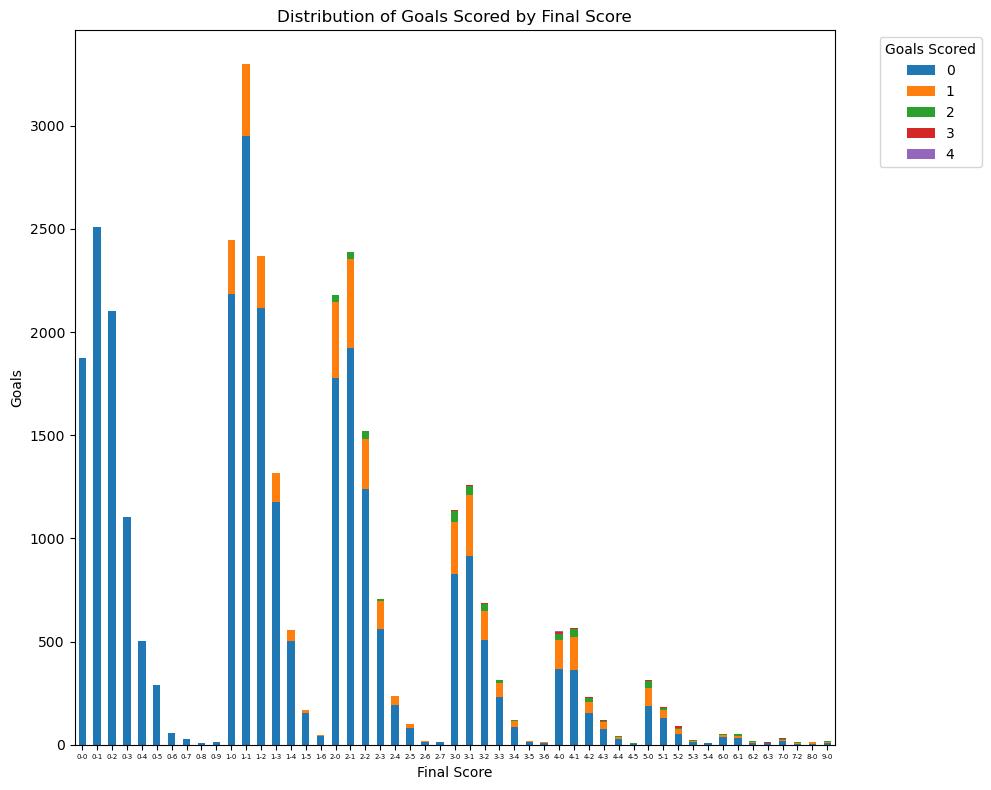

In [18]:
goals_by_score = att_explore_result.groupby(['Score', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

To the left of the plot, we have the results where the teams did not score a goal (0-0 to 0-9). We can try remove these observations, as the fact that the proportion of goals scored is zero when the team did not score any goals is not particularly useful information. 

In [19]:
goals_by_score = goals_by_score.reset_index()
goals_by_score = goals_by_score[~goals_by_score.iloc[:,0].str.split('-').str[0].astype(int).eq(0)]
goals_by_score = goals_by_score.set_index('Score')

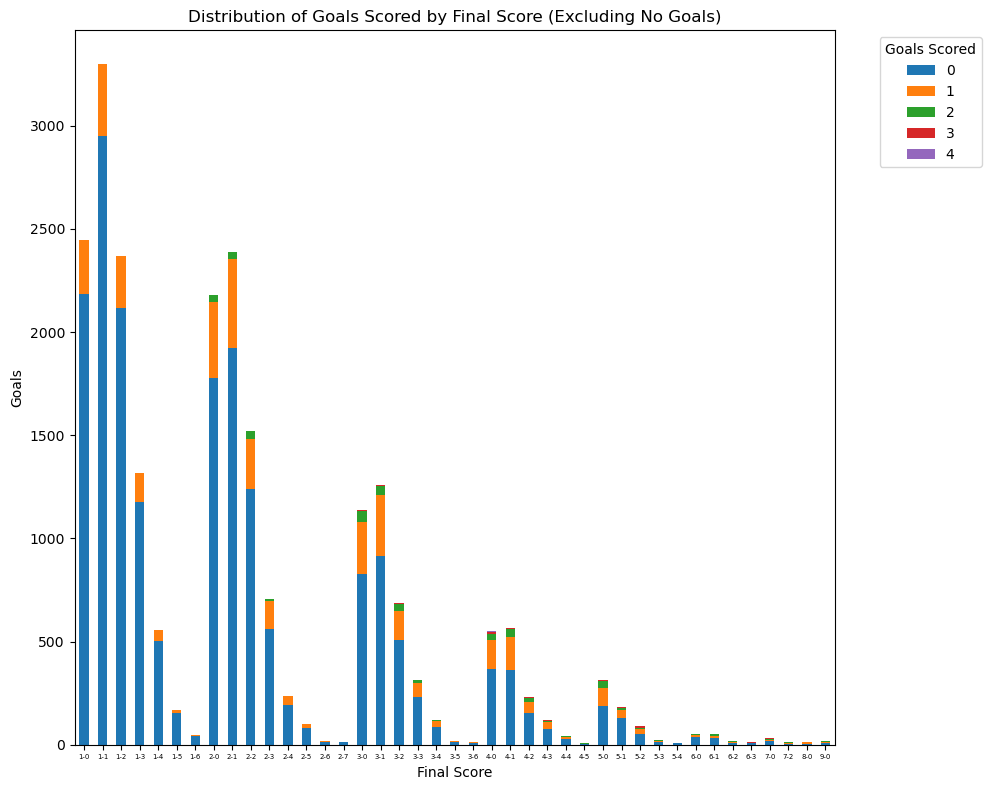

In [20]:
fig, ax = plt.subplots(figsize = (10, 8))

goals_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Final Score (Excluding No Goals)')
ax.set_xlabel('Final Score')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

This plot is quite difficult to read, because of the wide range in the lengths of the bars. Let's plot the proportion of goals scored instead, to help with both readability and interpretability. 

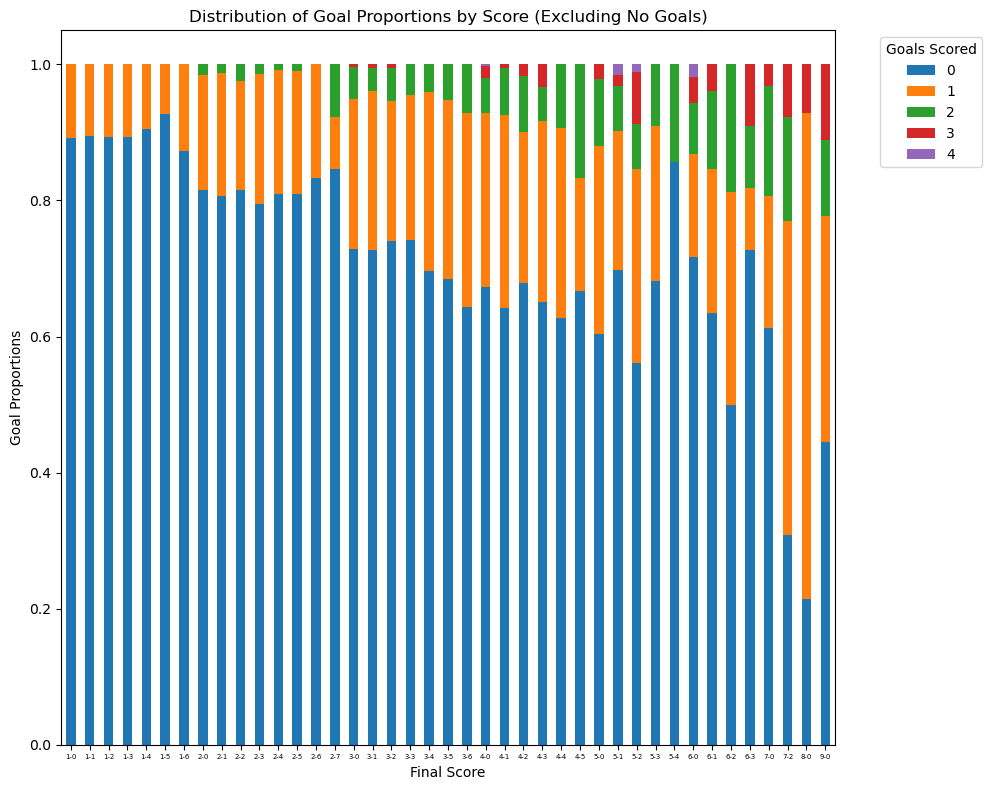

In [21]:
goalprop_by_score = goals_by_score.div(goals_by_score.sum(axis = 1), axis = 0)
fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_score.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Score (Excluding No Goals)')
ax.set_xlabel('Final Score')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 5)
plt.tight_layout()
plt.show()

The graph clearly shows that as the proportion of goals scored increases as the number of goals your team scores increases. Again, this may not be particularly revalatory, but it is still valuable information. We have the same problem where we don't know the final score prior to the match being played, meaning this feature may not be particularly useful when building the predictive model. However same as before, we can use other models that predict the scores prior to a match being played as information. 

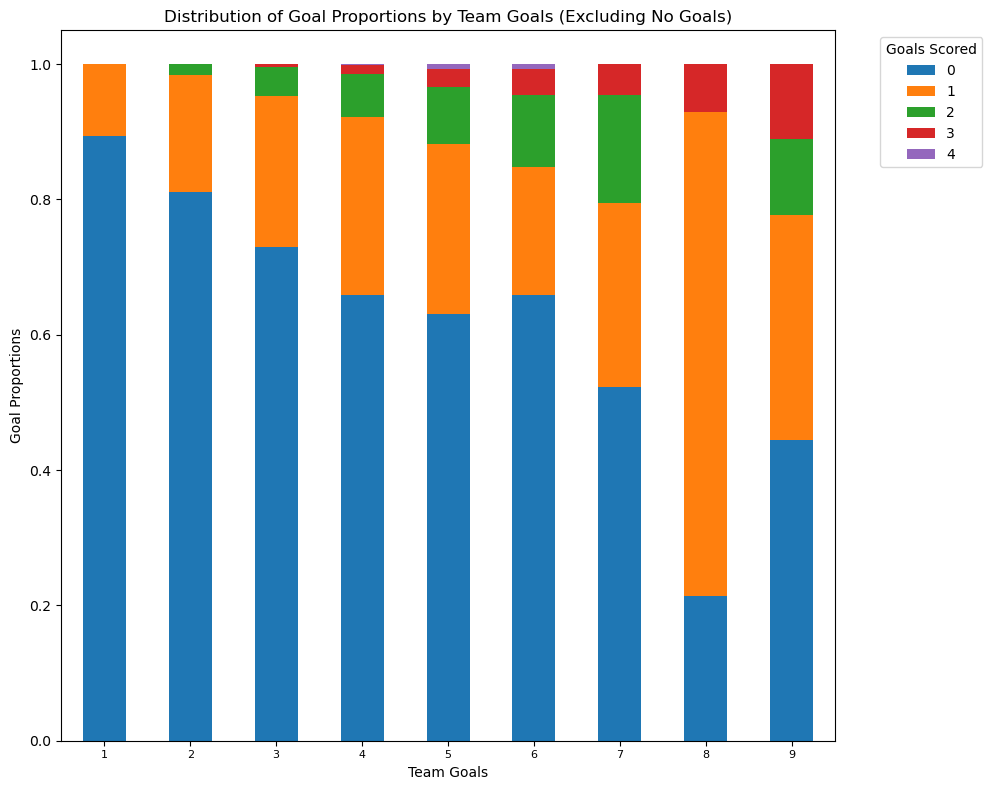

In [22]:
#adding another column called 'Team Goals', which is equivalent to the number of goals scored by the team in a particular match
goals_by_score = goals_by_score.reset_index()
goals_by_score['Team Goals'] = goals_by_score['Score'].str.split('-').str[0]
goals_by_score = goals_by_score.set_index('Score')

#grouping by team goals 
goals_by_teamgoals = goals_by_score.groupby('Team Goals').sum()

#getting the proportion of goals scored when grouped by team goals 
goalprop_by_teamgoals = goals_by_teamgoals.div(goals_by_teamgoals.sum(axis = 1), axis = 0)


fig, ax = plt.subplots(figsize = (10, 8))

goalprop_by_teamgoals.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team Goals (Excluding No Goals)')
ax.set_xlabel('Team Goals')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, fontsize = 8)
plt.tight_layout()
plt.show()

Same pattern as identified above. The more goals your team scores in a particular match, the greater the proportion of observations that have goals being scored. 

### 'Team' Feature Exploration

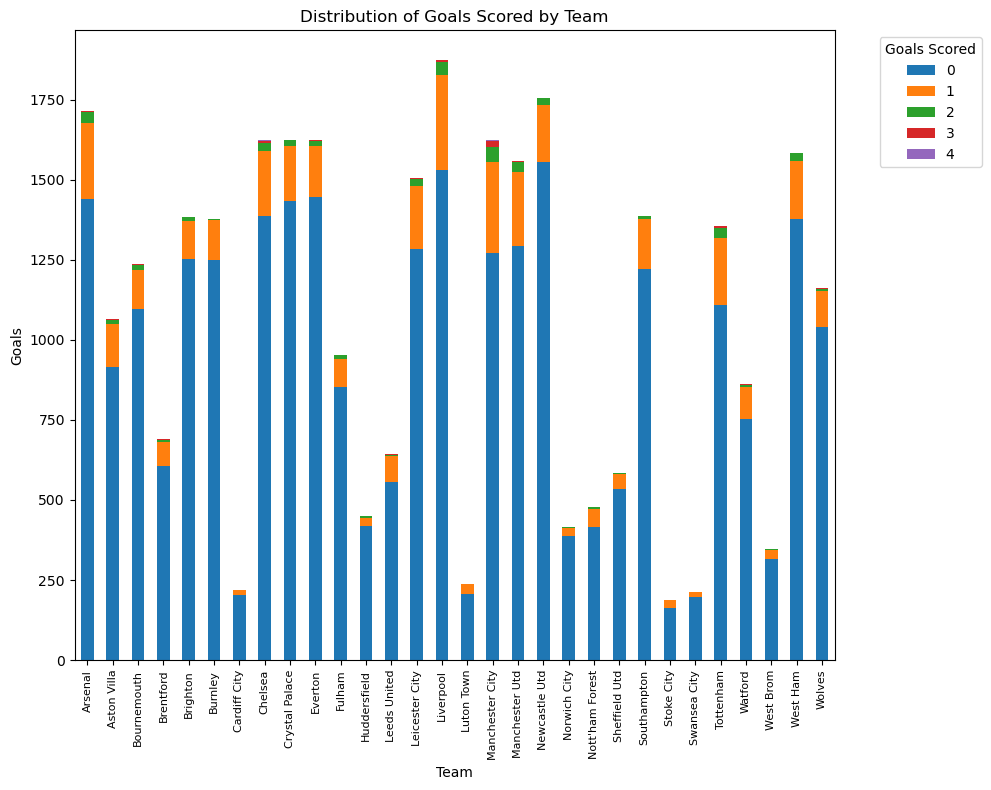

In [23]:
goals_by_team = att_explore.groupby(['Team', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Team')
ax.set_xlabel('Team')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

At first glance, it appears that there are certain teams that are associated with more observations that have goals being scored. Once again, we can instead plot the proportion of goals scored by each team for better interpretability 

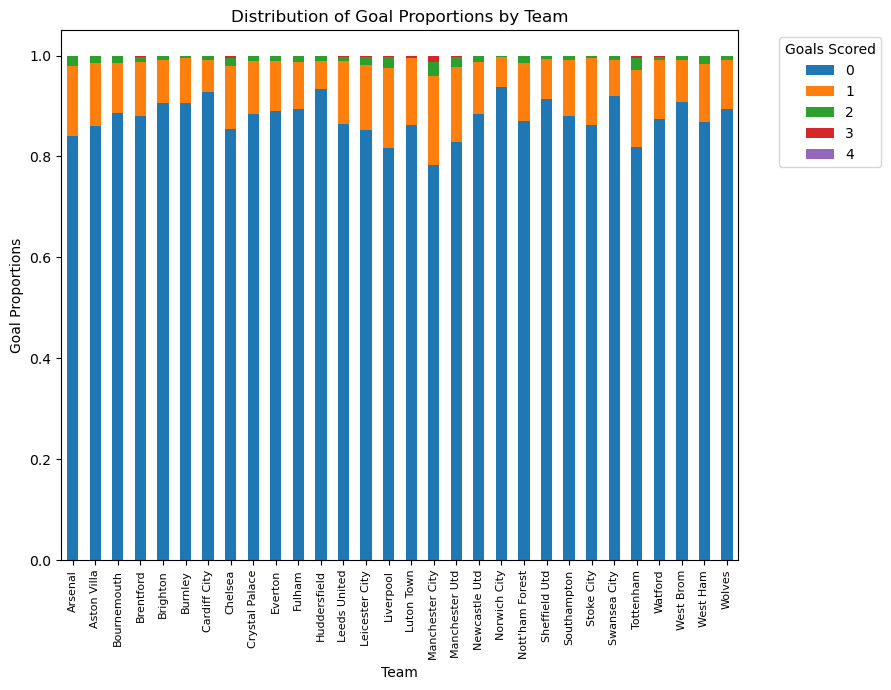

In [24]:
goalprop_by_team = goals_by_team.div(goals_by_team.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_team.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Team')
ax.set_xlabel('Team')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Can see that teams such as Arsenal, Chelsea, Liverpool, Manchester City and Tottenham have greater proportions of non-zero goal observations. This makes sense because these are considered to be the top teams in the league. This shows us that it is likely that team strength/ability likely plays into the probability that a particular player will score in a given game (the stronger the team, the more likely that they will score). 

### 'Opponent' Feature Exploration

We repeat the above analysis but this time for the opponents faced. Once again, we expect a similar pattern where there will be teams faced that lead to a greater proportion of goals scored. This is because certain teams will be weaker, meaning it is more likely that goals will be scored against them. 

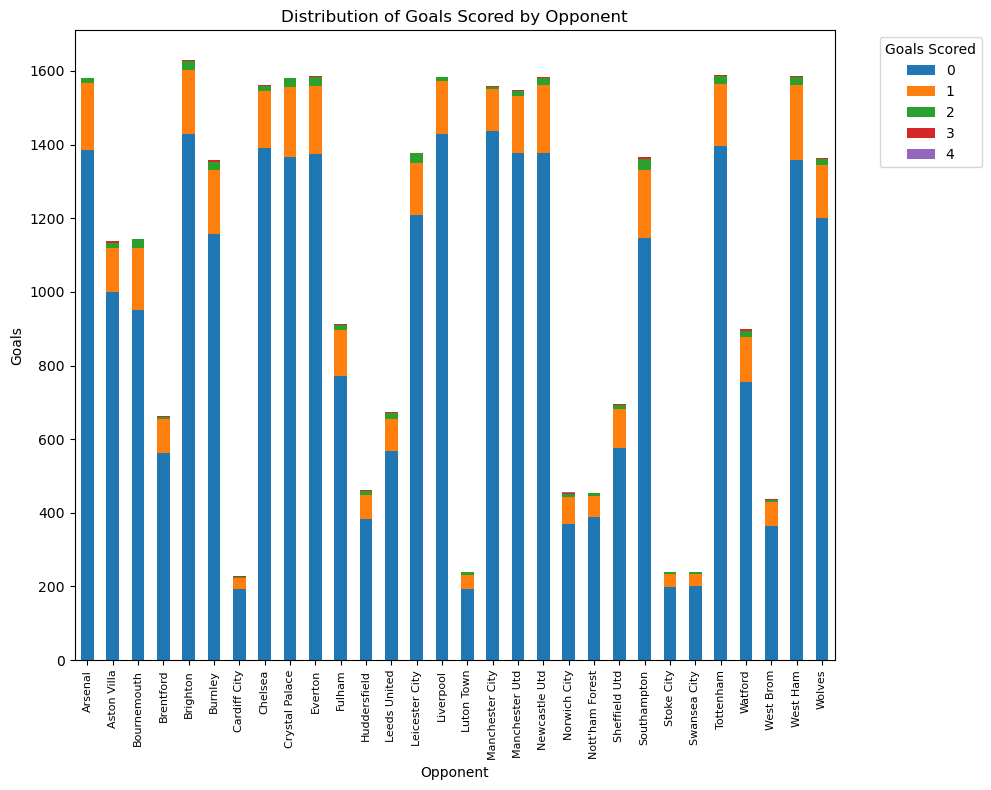

In [25]:
goals_by_opponent = att_explore.groupby(['Opponent', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent')
ax.set_xlabel('Opponent')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

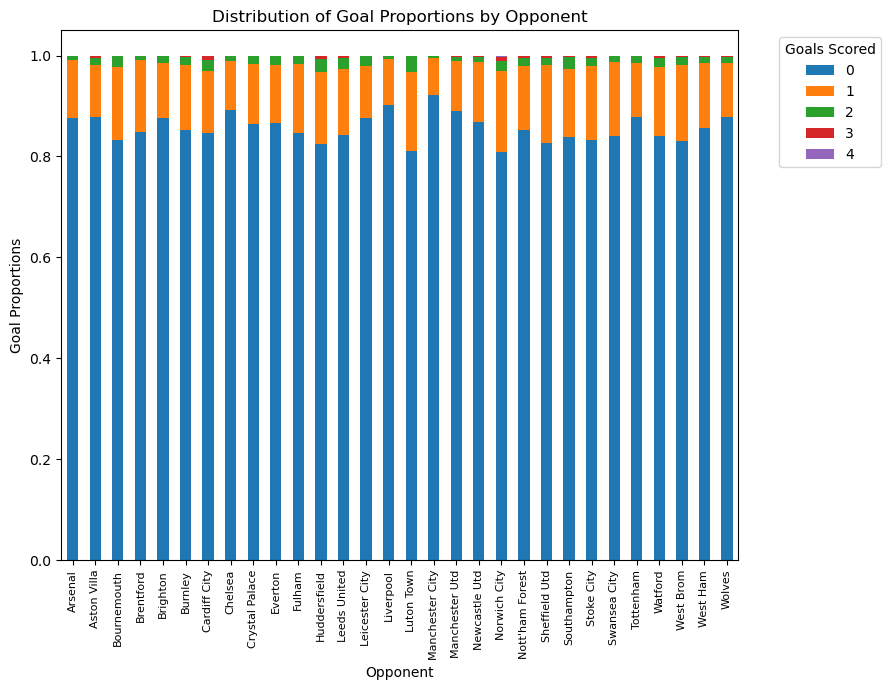

In [26]:
goalprop_by_opponent = goals_by_opponent.div(goals_by_opponent.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponent.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent')
ax.set_xlabel('Opponent')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There is definitely some variation, but the effect doesn't seem to be as pronounced as expected. For example, we expect Arsenal to be a better team than Brighton on average, therefore we expect a fewer proportion of goals to be scored when facing Arsenal as an opponent compared to facing Brighton as an opponent. However, the plot above shows that there appears to be a similar proportion of goals scored when facing Arsenal and Brighton. One reason for this is because teams have variation in their performance across the seasons. For example, there are certain seasons where Arsenal are considered to be one of the top teams in the league, but other seasons where they are a much more middling opposition. To investigate this, we can try plot the proportion of goals scored against an opponent based on the opponent's final place in the table at the end of the season. 

In [27]:
def determine_season(date):
    seasons = ('2024-2025', '2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018')
    matching = [s for s in seasons if str(date.year) in s]
    dynamic_timestamp = pd.Timestamp(f'{date.year}-08-01').tz_localize('GMT')
    
    if dynamic_timestamp <= date:
        return(matching[0])
    else: 
        return(matching[1])

In [31]:
#loading prem_table as a dataframe from source
prem_table = pd.read_csv('prem_table.csv', usecols = [1,2,3])

#adding a new column into att_explore which tells us which season a particular observation belongs to 
att_explore['Season'] = att_explore['kickoff_time'].apply(determine_season)

#creating a new dataframe called 'merged', which merges information from the prem_table dataframe and the att_explore dataframe
merged = att_explore.merge(prem_table, left_on = ['Opponent', 'Season'], right_on = ['Team', 'Season'], how = 'left')

#opp_pos is now a list, which we can then attach back onto att_explore 
opp_pos = merged['Position_y'].tolist()
att_explore['Opponent Position'] = opp_pos

AttributeError: 'str' object has no attribute 'year'

We can now plot goals by opponent position, instead of just by opponent

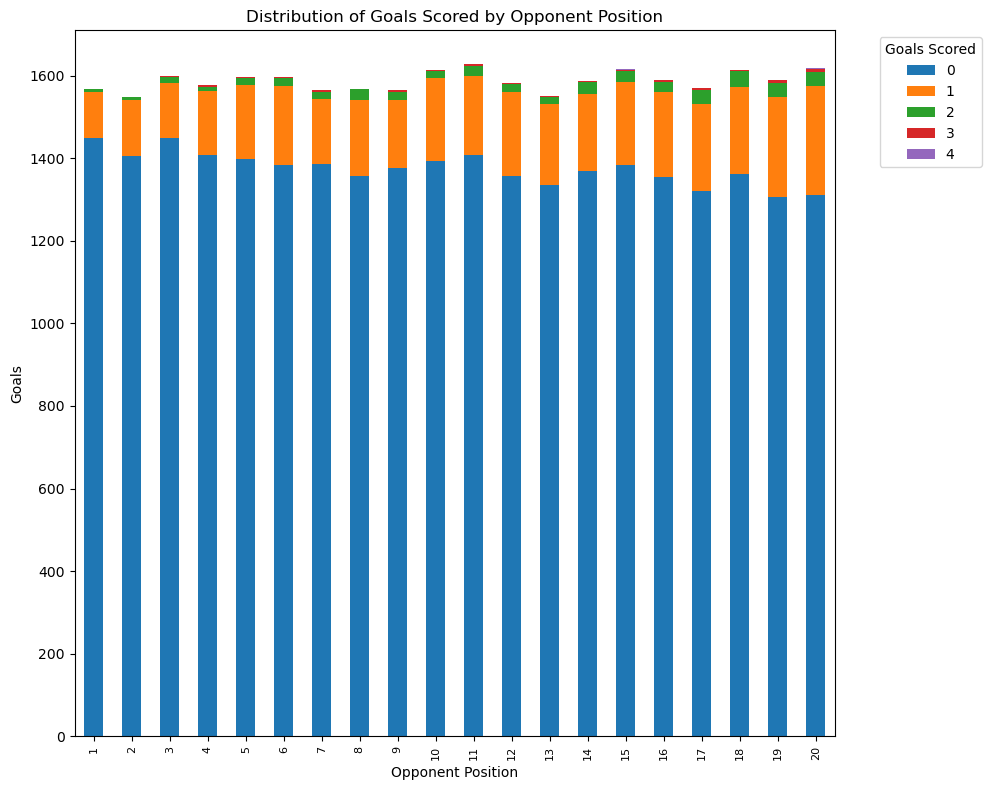

In [ ]:
goals_by_opponentpos = att_explore.groupby(['Opponent Position', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (10,8))

goals_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Opponent Position')
ax.set_xlabel('Opponent Position')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see a relatively clear pattern that shows that the lower the opponent's final position at the end of the season, the greater the proportion of goals is scored when facing them. This should be made even more clear if we plot the proportion of goals scored by opponent position. 

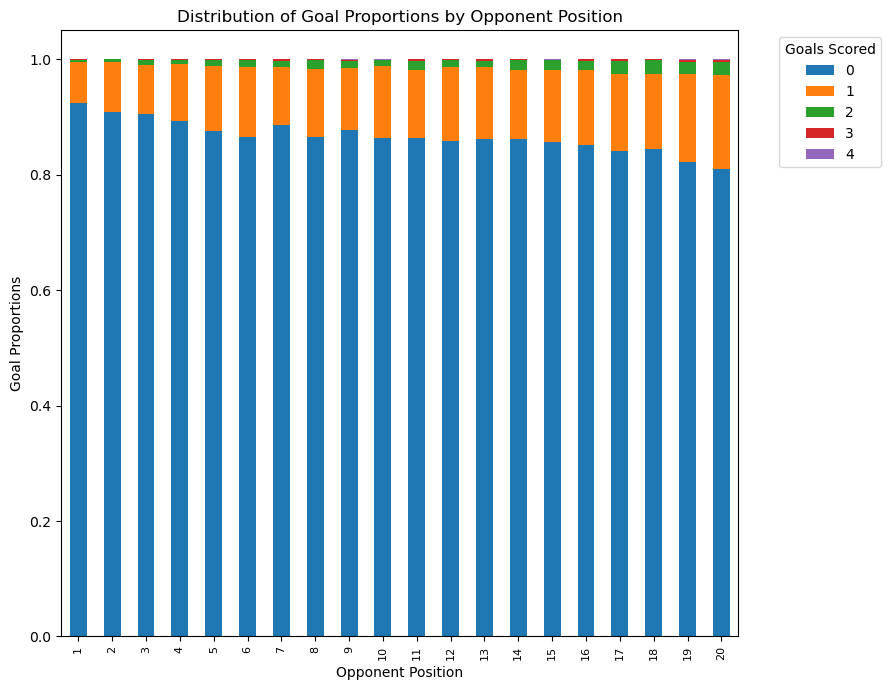

In [ ]:
goalprop_by_opponentpos = goals_by_opponentpos.div(goals_by_opponentpos.sum(axis = 1), axis = 0)

fig, ax = plt.subplots(figsize = (9,7))

goalprop_by_opponentpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Opponent Position')
ax.set_xlabel('Opponent Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

One limitation of this analysis is that it doesn't necessarily capture the ebs and flows that a team goes through throughout a season. For example, the team that ended up finishing 20th might have had a really good start to the season, and were considered to be one of the stronger teams initially. But because of injuries to key players, the team got a lot weaker throughout the season, eventually leading to them finishing 20th. In this case, facing this team at the beginning of the season would've been a much more difficult game than facing them at the end of the season. 

### 'Start' Feature Exploration

'Start' is a feature that tells us whether or not a given player started a game or not. The general consensus is that players that start games are more likely to score. This is because they are generally on the pitch for a longer period of time. 

In [ ]:
att_explore['Start'].unique()

array(['Y', 'N', 'Y*'], dtype=object)

We can see that the 'Start' feature has 3 columns. 
* Y = This player started this game 
* N = This player did not start this game 
* Y* = This player started the game as club captain


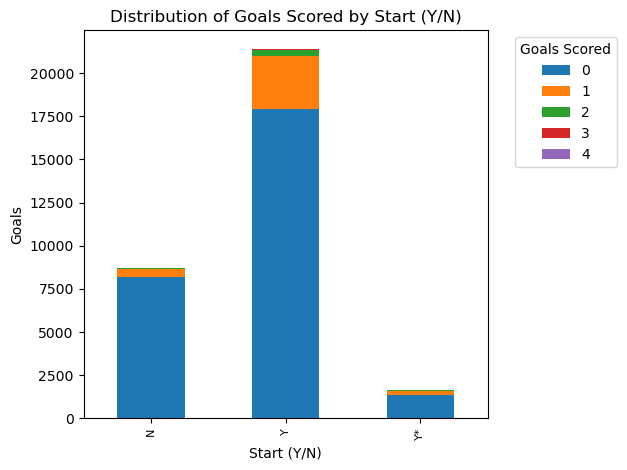

In [ ]:
goals_by_start = att_explore.groupby(['Start', 'Goals']).size().unstack(fill_value = 0)

fig, ax = plt.subplots()

goals_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goals Scored by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')

ax.set_ylabel('Goals')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)
plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

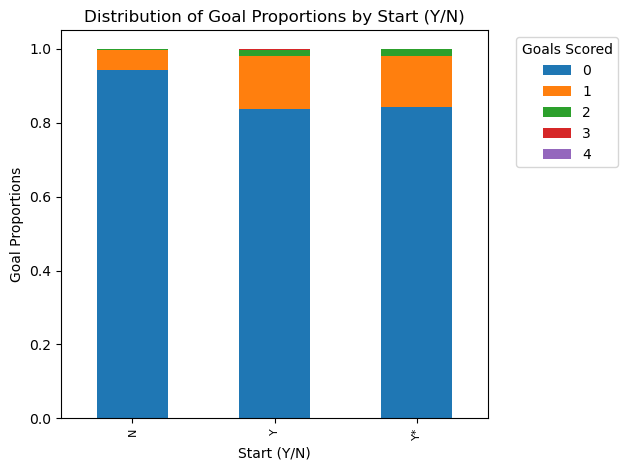

In [ ]:
goalprop_by_start = goals_by_start.div(goals_by_start.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_start.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Start (Y/N)')
ax.set_xlabel('Start (Y/N)')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

There are two key observations, the first is that the proportion observations with goals scored is higher when the player starts a game, compared to if they didn't start the game. This is as expected. The other observation is that it starting the game as the team captain does not necessarily have any effect on the proportion of goals scored. Therefore, we can probably combine the Y and Y* observations together, since being a captain is unlikely to have any effect on the player scoring a goal in a particular game. 

### Position Feature Exploration

In [ ]:
positions = att_explore['Position'].unique()
positions

array(['DM', 'LW', 'CM', 'LM', 'FW', 'DM,AM', 'AM', 'RM', 'CM,AM',
       'DM,CM', 'RW', 'FW,RW', 'AM,LW', 'RW,WB', 'RW,LW', 'CM,LM',
       'LM,FW', 'FW,AM', 'RM,CM', 'AM,DM', 'LW,RW', 'RB', 'LW,LM',
       'LM,CM', 'CM,DM', 'RW,RM,WB', 'RM,DM,CM', 'LM,LW', 'AM,CM',
       'WB,LM,CM', 'RM,RW', 'RM,LM,AM', 'RW,LM,CM', 'DM,RB', 'LW,DM',
       'LM,AM', 'CM,DM,AM', 'WB,FW', 'RB,DM,CM,RM', 'FW,LM', 'WB',
       'DM,CM,AM', 'LM,CM,DM', 'CM,RB', 'AM,FW', 'CB', 'DM,RM', 'RW,RM',
       'RM,LB', 'FW,RM', 'LB', 'FW,LW', 'CM,RM', 'AM,LB', 'DM,CB',
       'RW,AM', 'FW,CM', 'CM,RM,WB', 'RM,LM', 'CM,RM,LM', 'RW,FW',
       'LW,CM', 'LW,FW', 'AM,RM', 'FW,AM,LW', 'LW,WB', 'DM,LM',
       'LM,RM,LW', 'WB,AM', 'RB,CM', 'LM,DM', 'AM,RW', 'RM,AM', 'CM,FW',
       'LW,LB', 'LM,RM', 'FW,CM,AM', 'RB,RM', 'RM,FW', 'RW,LW,FW',
       'LW,CB', 'RM,LW', 'RM,LW,AM', 'RM,LM,CM', 'RW,LW,LM', 'LW,AM',
       'FW,RB', 'RB,RM,CM', 'RM,DM', 'CM,LW', 'CM,RW', 'AM,RW,LW',
       'WB,RW', 'LB,RW', 'LB,LW,RW', 'LM,DM,CM'

We can see that there are quite a few unique positions. This is down to the fact that certain observations may be recorded to have played multiple positions in one game. We want to first isolate how many unique positions there are. 

In [ ]:
unique_positions = set()

for position in positions:
    for pos in position.split(','):
        unique_positions.add(pos.strip())
        
unique_positions = list(unique_positions)

print(unique_positions)

['LW', 'LM', 'RB', 'WB', 'CB', 'CM', '0', 'RW', 'DM', 'AM', 'RM', 'LB', 'FW']


So we have 12 unique positions, and '0' for some reason. Let's first investigate the observations that have '0' in their position. 

In [ ]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,...,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,Season,Opponent Position
7668,117,Sat,28,Home,L 2–4,Wolves,Leeds United,N,0,0,...,0,16256,0.0,-3,-92,423,515,48,2022-2023,19
17110,230,Tue,1,Home,L 0–1,Burnley,Manchester Utd,N,0,11,...,0,45067,28.0,1,-428,2482,2910,48,2020-2021,2
3733,58,Tue,1,Home,L 0–1,Burnley,Manchester Utd,N,0,3,...,0,18618,2.0,1,-1092,120,1212,58,2020-2021,2
26879,364,Wed,1,Home,W 2–0,Manchester City,Aston Villa,N,0,19,...,0,272796,6.0,1,-29133,14713,43846,81,2020-2021,11


From looking at these games individually, we can manually fill in the positions played by these players. 

* 7668 - Player Sent Off on Bench 
* 17110 - FW
* 3733 - FW
* 26879 - RW

So we will remove observation 7668, since this player did not play

In [ ]:
att_explore = att_explore.drop(index = 7668)

In [ ]:
att_explore.loc[17110, 'Position'] = 'FW'
att_explore.loc[3733, 'Position'] = 'FW'
att_explore.loc[26879, 'Position'] = 'RW'

We can now confirm that there are no longer any observations that have '0' entry in Positions 

In [ ]:
att_explore[att_explore['Position'].str.contains('0', na = False)]

,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,...,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,Season,Opponent Position


One issue with the data is that we don't know how many minutes of a game were played in each position, for a player that has been listed as playing multiple positions in a game. For example, if a player is played in the FW position for 85 minutes of the game, before tactical adjustments mean that they play in the LB position for the remainder of the game, the data might be skewed to show that LB's have better attacking potential than what it may be in reality. Unfortunately, there isn't any data that allows us to input the 'primary' position of a player in a particular game. Therefore, the best way to proceed at this stage is to first one-hot encode the position column. 

In [ ]:
positions = att_explore['Position']

positions_df = pd.DataFrame(positions, columns = ['Position'])

positions_encode = positions_df['Position'].str.get_dummies(sep = ',')

In [ ]:
print(positions_encode)

       AM  CB  CM  DM  FW  LB  LM  LW  RB  RM  RW  WB
10000   0   0   0   1   0   0   0   0   0   0   0   0
24977   0   0   0   0   0   0   0   1   0   0   0   0
37756   0   0   1   0   0   0   0   0   0   0   0   0
18759   0   0   0   0   0   0   1   0   0   0   0   0
168     0   0   0   0   0   0   1   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
31381   0   0   1   1   0   0   1   0   0   0   0   0
5199    0   0   0   0   0   0   0   1   0   0   0   0
8243    0   1   0   0   0   0   0   0   0   0   0   0
8823    0   0   0   0   0   0   0   0   0   0   1   0
25620   0   0   0   0   0   0   0   0   0   0   1   1

[31737 rows x 12 columns]


It appears that the encoding worked, just to double check, we want to make sure that there is a 1 in every single observation. 

In [ ]:
positions_encode.any(axis = 1).sum()

31737

Now that we are sure that the encoding was successful, we want to append these columns back into the att_explore dataframe, as well as remove the 'Position' dataframe 

In [ ]:
att_explore = pd.concat([att_explore, positions_encode], axis = 1)
att_explore.head()

,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,Minutes Played,...,CM,DM,FW,LB,LM,LW,RB,RM,RW,WB
10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,90,...,0,1,0,0,0,0,0,0,0,0
24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,23,...,0,0,0,0,0,1,0,0,0,0
37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,90,...,1,0,0,0,0,0,0,0,0,0
18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,25,...,0,0,0,0,1,0,0,0,0,0
168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,84,...,0,0,0,0,1,0,0,0,0,0


Let's now have a look to see the frequency of each of the position encoded columns

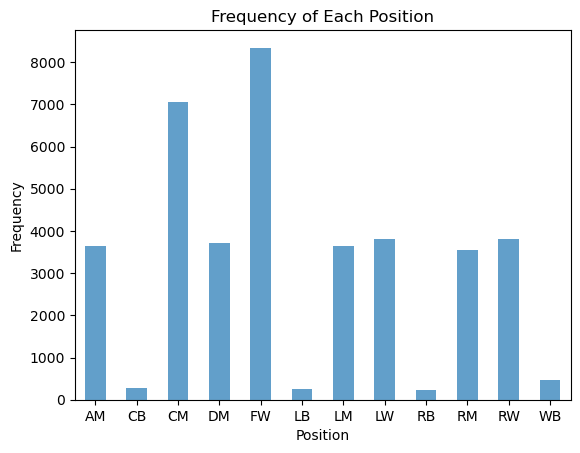

In [ ]:
#these are the columns in att_explore that represent the positions that a given observation played in that game 
position_col = ['AM', 'CB', 'CM', 'DM', 'FW', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW', 'WB']

position_count = att_explore[position_col].sum()

fig, ax = plt.subplots()

position_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Each Position')
plt.xticks(rotation = 0)
plt.show()

Initial observations are there are very few players with positions listed as CB, LB, RB or WB. This makes a lot of sense, because we are currently only working with the attackers data. It wouldn't make much sense if there were comparable amounts of observations with these positions listed, compared to actual attacking positions such as FW. In contrast, the most frequent position was FW, which also makes sense. Let's now take a look at how the proportion of goals scored differs across each position. 

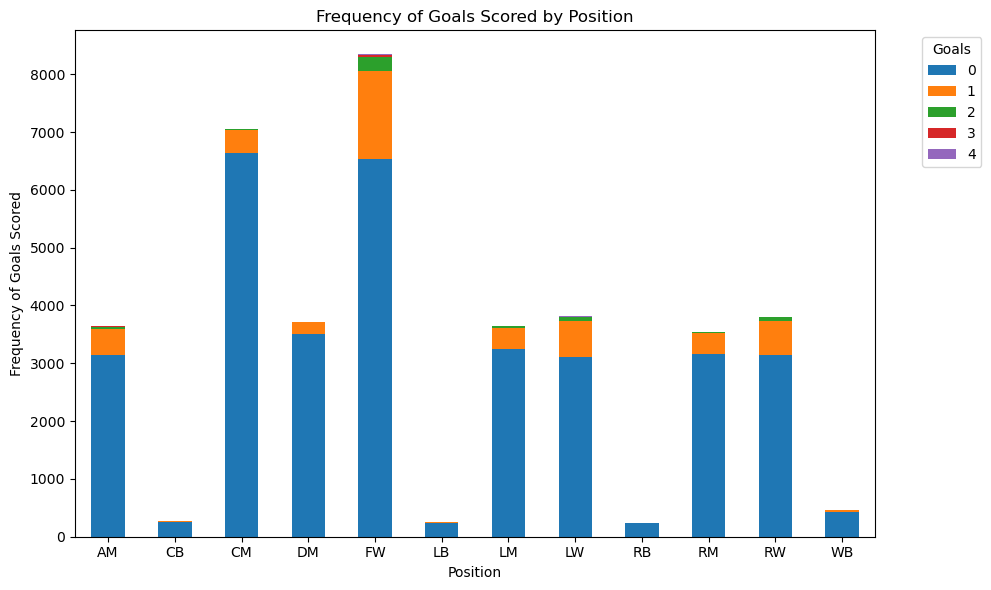

In [ ]:
# Initialize a dictionary to store frequency of goal counts by position
goal_counts_by_position = {position: {} for position in position_col}  # Exclude 'Goals'

# Loop through each position column
for position in position_col:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_by_position[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_bypos_df = pd.DataFrame(goal_counts_by_position).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_bypos_df = goal_counts_bypos_df.T

# Plotting
goal_counts_bypos_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('Frequency of Goals Scored')
plt.title('Frequency of Goals Scored by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Goals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

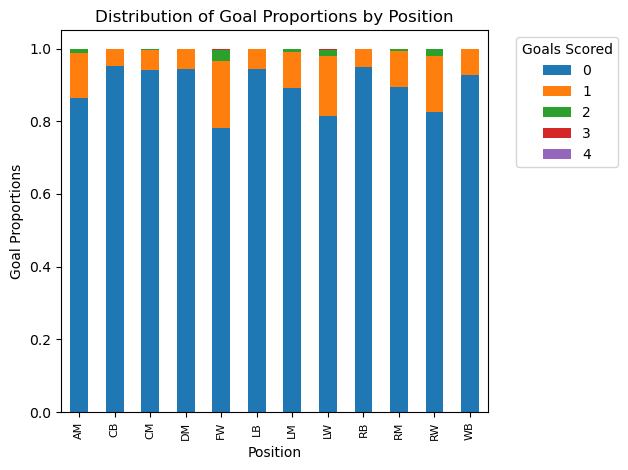

In [ ]:
goalprop_by_position = goal_counts_bypos_df.div(goal_counts_bypos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_position.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

It is interesting that the proportion of goals scored seems to be quite even for CB, CM, DM, LB, RB and WB. Although it was expected that the proportion of goals scored when the listed position is CB, LB, RB and WB should be low, it was unexpected that the proportion of goals is also so low for both DM's and CM's. It is also not unexpected to see that the proportion of goals scored is highest for FW, followed by RW/LW, then AM, then RM/LM. We can now try to group certain positions together to see whether similar behaviours are exhibited. 

* RB, LB, CB, WB - Defenders
* DM, CM - Midfielders
* LM, RM - Wide Midfielders 
* AM - Attacking Midfielders
* LW, RW - Wide Forwards 

In [ ]:
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB', 'WB']].any(axis = 1).astype(int)
print(att_explore['Defenders'])

10000    0
24977    0
37756    0
18759    0
168      0
        ..
31381    0
5199     0
8243     1
8823     0
25620    1
Name: Defenders, Length: 31737, dtype: int64


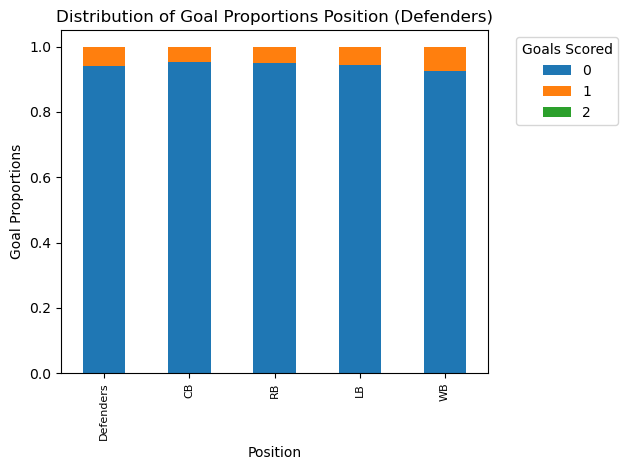

In [ ]:
position_def = ['Defenders', 'CB', 'RB', 'LB', 'WB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the plot above, it appears that having WB as a position makes it more likely that a goal is scored, compared to playing as a CB/LB/RB. We can try to instead include only CB, RB and LB into the 'Defenders' category. Based on contextual information, this does make a bit more sense. WB's are typically used in 3 at the back formations, where they function as defenders out of possession, but are almost wingers in possession as they get high and wide on the pitch to provide the width. This is in comparison to typical CB/RB/LB's who are defenders both in and out of possession, and will rarely venture forward in the attack. 

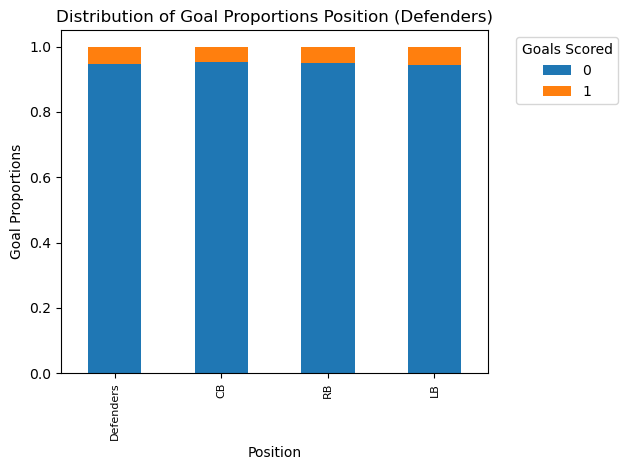

In [ ]:
#we modify the 'Defenders' column to only include 'RB', 'LB' and 'CB'
att_explore['Defenders'] = att_explore[['RB', 'LB', 'CB']].any(axis = 1).astype(int)

position_def = ['Defenders', 'CB', 'RB', 'LB']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_def = {position: {} for position in position_def}  # Exclude 'Goals'

# Loop through each position column
for position in position_def:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_def[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_def_df = pd.DataFrame(goal_counts_def).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_def_df = goal_counts_def_df.T

goalprop_def = goal_counts_def_df.div(goal_counts_def_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_def.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Defenders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see this time that the proportion of goals scored by Defenders (either CB, LB or RB) is closer to the proportion of goals scored when looking at the specific defensive positions. We can now move on to looking at midfielders. 

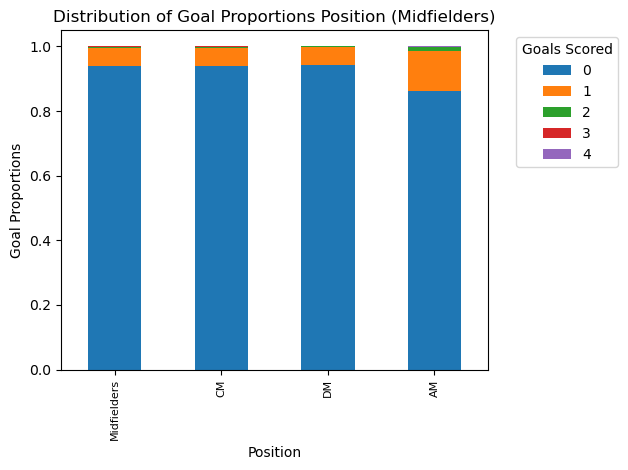

In [ ]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Midfielders'] = att_explore[['CM', 'DM']].any(axis = 1).astype(int)

position_mid = ['Midfielders', 'CM', 'DM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_mid = {position: {} for position in position_mid}  # Exclude 'Goals'

# Loop through each position column
for position in position_mid:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_mid[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_mid_df = pd.DataFrame(goal_counts_mid).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_mid_df = goal_counts_mid_df.T

goalprop_mid = goal_counts_mid_df.div(goal_counts_mid_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_mid.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

As expected, the proportion of goals scored in the Midfielders category is similar to the proportion when looking at CM and DM positions individually. Therefore, it makes sense to combine these two categories. We can also see that attacking midfielders AM seem to score a lot more goals than either CM's or DM's, so it wouldn't make sense to include AM's into the Midfielders category. We now move onto Wide Midfielders.

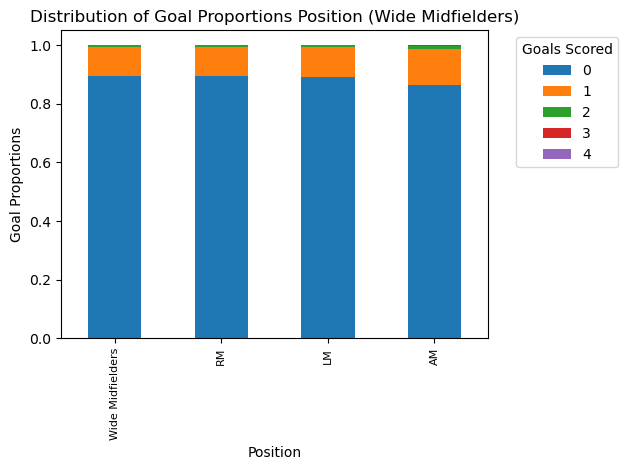

In [ ]:
#we group CM and DM into one category called ' Wide Midfielders'
att_explore['Wide Midfielders'] = att_explore[['RM', 'LM']].any(axis = 1).astype(int)

position_wm = ['Wide Midfielders', 'RM', 'LM', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wm = {position: {} for position in position_wm}  # Exclude 'Goals'

# Loop through each position column
for position in position_wm:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wm[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wm_df = pd.DataFrame(goal_counts_wm).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wm_df = goal_counts_wm_df.T

goalprop_wm = goal_counts_wm_df.div(goal_counts_wm_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wm.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wide Midfielders)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, similar result where the plot shows that combining these two categories appears to make sense. We can also see that attacking midfielders seem to score more goals than wide midfielders, so it wouldn't make sense to include AM into this category. Finally, we will do the wingers/wide forwards. 

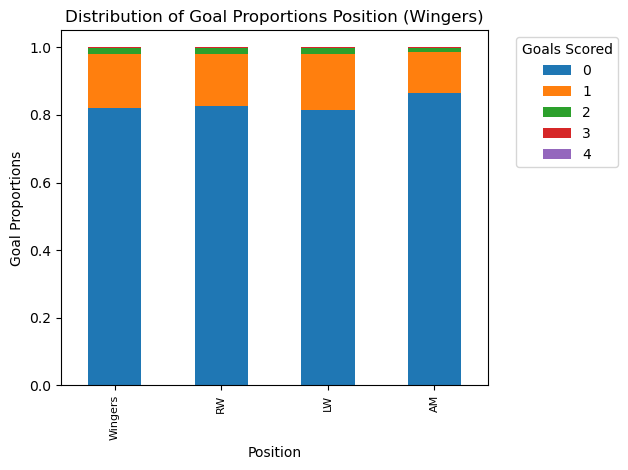

In [ ]:
#we group CM and DM into one category called 'Midfielders'
att_explore['Wingers'] = att_explore[['RW', 'LW']].any(axis = 1).astype(int)

position_wingers = ['Wingers', 'RW', 'LW', 'AM']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_wingers = {position: {} for position in position_wingers}  # Exclude 'Goals'

# Loop through each position column
for position in position_wingers:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_wingers[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_wingers_df = pd.DataFrame(goal_counts_wingers).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_wingers_df = goal_counts_wingers_df.T

goalprop_wingers = goal_counts_wingers_df.div(goal_counts_wingers_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_wingers.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions Position (Wingers)')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

We can see that the proportion of goals scored when looking at RW and LW individually is very simila to the proportion of goals scored when combining these observations under one category 'Wingers'. Therefore, it makes sense to combine LW and RW together. We can also see that AM's seem to score less goals than wingers, so it wouldn't make sense to include it into the Wingers category. Overall, the AM category should be a standalone category. 

Let's now plot the combined categories together

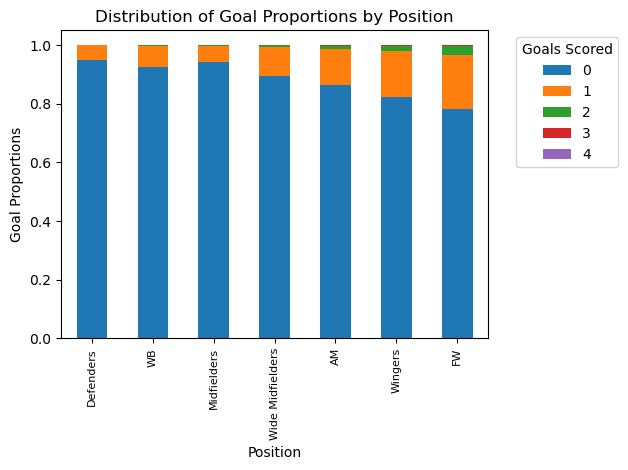

In [ ]:
position_final = ['Defenders', 'WB', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']

# Initialize a dictionary to store frequency of goal counts by position
goal_counts_finalpos = {position: {} for position in position_final}  # Exclude 'Goals'

# Loop through each position column
for position in position_final:  # Exclude the 'Goals' column
    # Get the goals for rows where the position column is 1
    goals = att_explore[att_explore[position] == 1]['Goals']
    
    # Count the frequency of each goal value
    goal_counts = goals.value_counts()
    
    # Store the counts in the dictionary
    goal_counts_finalpos[position] = goal_counts

# Create a DataFrame for plotting
goal_counts_finalpos_df = pd.DataFrame(goal_counts_finalpos).fillna(0)

# Transpose the DataFrame for easier plotting
goal_counts_finalpos_df = goal_counts_finalpos_df.T

goalprop_finalpos = goal_counts_finalpos_df.div(goal_counts_finalpos_df.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_finalpos.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Based on the summarised positions, we can clearly see that the proportion of goals scored is lowest for Defenders, followed closely by Midfielders. Perhaps surprisingly, the proportion of goals scored by WB's is higher than Midfielders, which is then followed by Wide Midfielders. As Wingers and Forwards play furthest up the pitch, it makes sense that the proportion of goals scored is highest for these two positions. To summarise, the hypothesised method of combining positions makes sense, based on the exploratory analysis. 

### 'Minutes Played' Feature Exploration

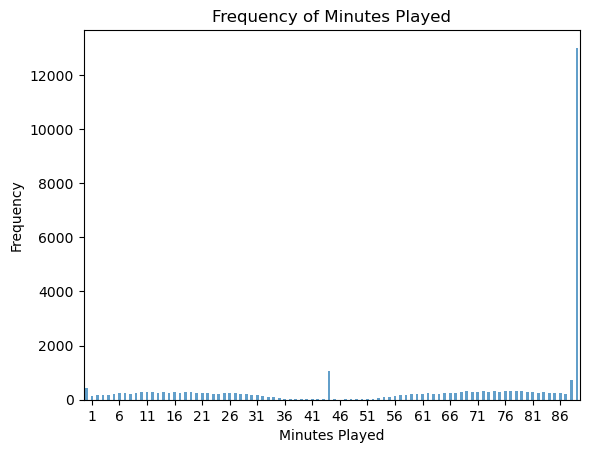

In [ ]:
mins_count = att_explore['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is that majority of the observations in the data set played the full 90 minutes of the game. It may be a little difficult to see the behaviour of the other 'Minutes Played' due to how long the bar for 'Minutes Played' = 90 is. We can exclude this bar from the plot to better visualise the frequency of 'Minutes Played'. 

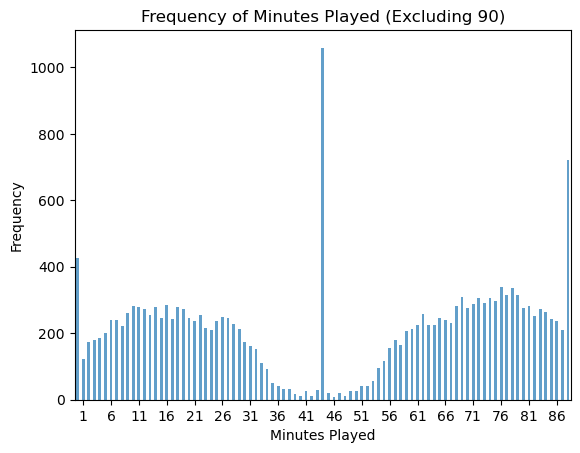

In [ ]:
mins_count = mins_count.iloc[:-1]
fig, ax = plt.subplots()

mins_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (Excluding 90)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 89, 5))
ax.set_xticklabels(range(1, 89, 5))

plt.xticks(rotation = 0)
plt.show()

What we can see is some sort of symmetry between the left hand side of the plot and the right hand side of the plot. The most frequent minutes played excluding 90 minutes is 44/45 minutes, which refers to the observations that either played the first half and got subbed, or got subbed on the play the second half. The symmetry has to do with the fact that for each player being subbed off, there is another being subbed on. For example, if a observation played 70 minutes and got subbed off, then another observation would be subbed on to play 20 minutes. Based on this, we can see that the most frequent substitutions are approximately between the 68 to 78 minute mark. Subsitutions are quite rare between 46 and 56. Based on this, we can perhaps classify 'Minutes Played' as either:

1. 90 Minutes - Full Match Played
2. 46-89 Minutes - Substituted Off
3. 1-44 Minutes - Substituted On

However prior to this, we should first plot the raw 'Minutes Played' data against 'Goals Scored' to visualise the relationship. Since 'Minutes Played' is essentially a continuous variable (it isn't actually, but we can treat it as such), it wouldn't be wise to visualise the relationship between this feature and the target variable in the same way that we have done for the previous features. Instead, we can start by constructing a box plot. This should allow us to identify the distribution of Minutes Played for each category of Goals. 

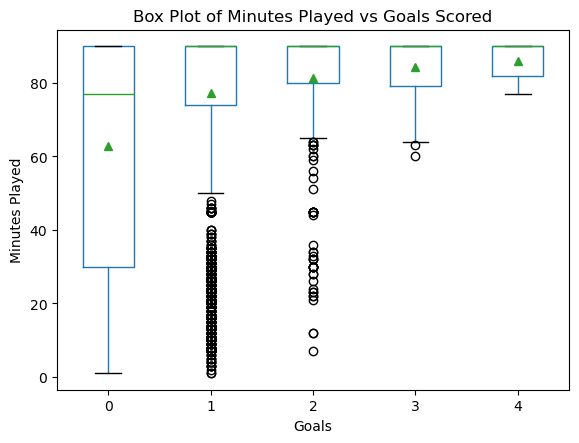

In [30]:
plt.figure
att_explore.boxplot(column = 'Minutes Played', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

What we can immediately identify is that the median minutes played is 90 (i.e. the player both started and finished the game) for all observations that contained at least 1 goal scored. We can also see that although the lower extreme for 1 goal scored is at approximately 50 minutes, there are quite a few observations where the minutes played is less than 50, but the player still managed to score a goal. A similar phenomenon can be seen for observations where 2 goals were scored, albeit less frequently. What may be useful is to separate the observations that played 90 minutes, and those that didn't. In other words, we can have a look at whether or not the behaviour of goals scored differs for players that played the whole game, and players that were either substituted on or off during the game. 

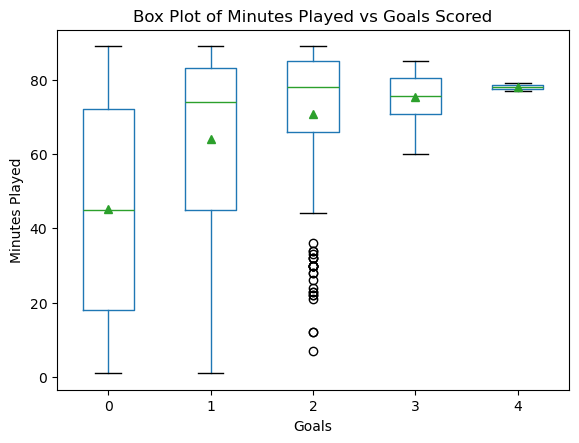

In [29]:
#new dataframe that excludes all observations where 'Minutes Played' == 90
subs_df = att_explore[att_explore['Minutes Played'] != 90]
subs_df = subs_df[['Minutes Played', 'Goals', 'Start']]

plt.figure
subs_df.boxplot(column = 'Minutes Played', by = 'Goals', grid = False, showmeans = True)
plt.title('Box Plot of Minutes Played vs Goals Scored')
plt.suptitle('')
plt.xlabel('Goals')
plt.ylabel('Minutes Played')
plt.show()

This plot makes it clear that of the players that did not play 90 minutes, the ones who scored at least one goal generally played more than 70 minutes. Although there are still some outliers, particularly in the observations that scored 2 goals, there appears to be sufficient justification that more minutes leads to a greater probability of scoring a goal. 

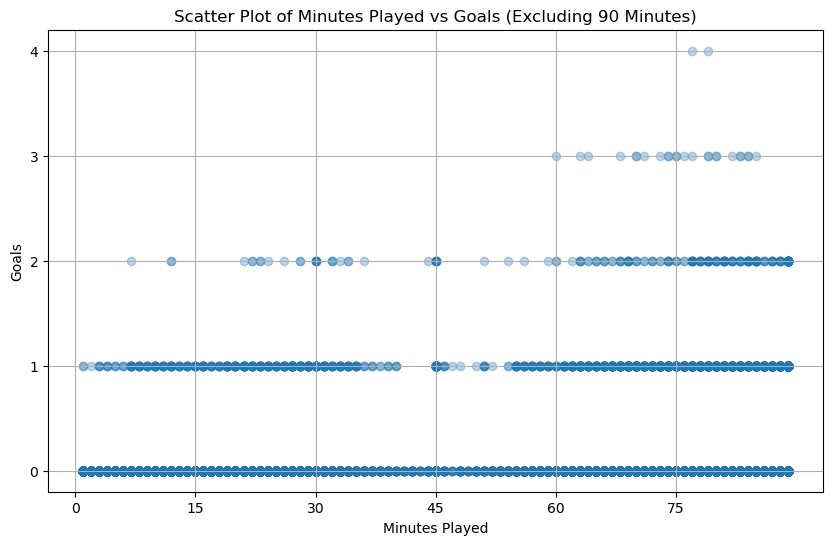

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()
plt.show()

This scatter plot is interesting for a few reasons. Firstly, we can see that there is quite an even distribution of observations that did not score any goals in terms of minutes played. However for the observations that scored 1 goal, there appears to be quite a bit more observations that played less than 45 minutes (i.e. they were subbed on) than perhaps expected. We can see this even more clearly if we reproduce the same plot, but change the colour of the observations that did not start the game (if they did not start but still played, this means that they were subbed on). 

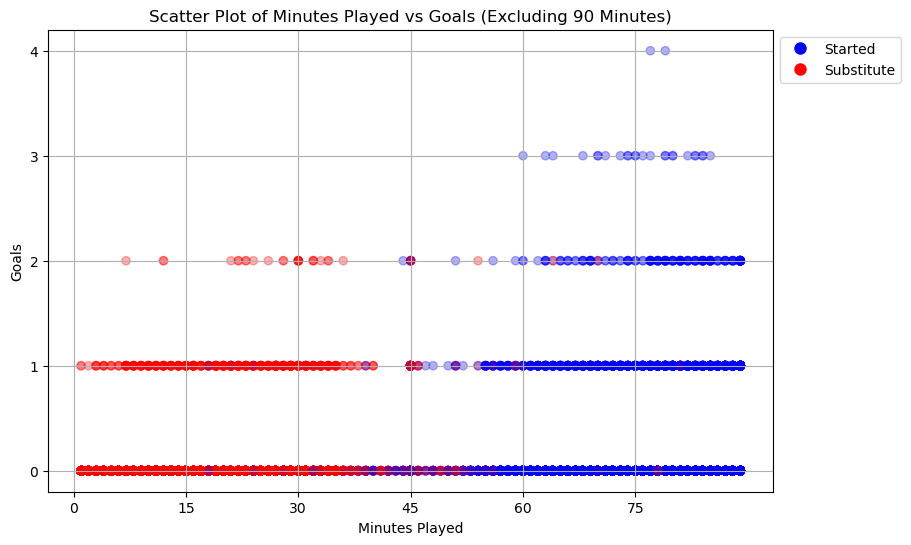

In [ ]:
# Scatter plot - Colour coded based on 'Start'

subs_col = subs_df['Start'].map({'Y': 'blue', 'Y*': 'blue', 'N': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(subs_df['Minutes Played'], subs_df['Goals'], alpha=0.3, c = subs_col)
plt.title('Scatter Plot of Minutes Played vs Goals (Excluding 90 Minutes)')
plt.xlabel('Minutes Played')
plt.ylabel('Goals')
plt.xticks(range(0, 90, 15))  # Adjust x-ticks as necessary
plt.yticks(range(0, 5))  # Goals range from 0 to 4
plt.grid()

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Started', 
                            markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Substitute', 
                            markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor = (1,1))
plt.subplots_adjust(right = 0.85)
plt.show()

This plot makes clear that it is much more likely that a given observation scores 2 or more goals if they started the game compared to if they were subbed on. This information was perhaps already made obvious when looking at the relationship between the 'Starts' feature and 'Goals'. However, it is interesting that there appears to be quite an even spread of observations which scored one goal, in terms of whether or not they started the game or not, as well as the number of minutes they played. We can make another plot to further investigate this. 

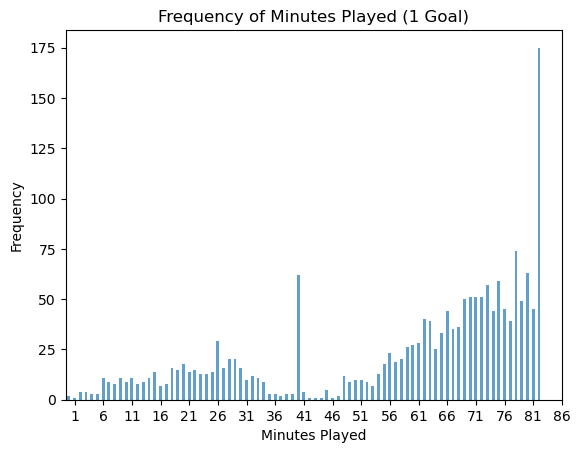

In [ ]:
#we are further reducing the dataframe to only include observations that scored one goal
subs_df = subs_df[subs_df['Goals'] == 1]

mins_count_1goal = subs_df['Minutes Played'].value_counts().sort_index()

fig, ax = plt.subplots()

mins_count_1goal.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Minutes Played')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Minutes Played (1 Goal)')
#set_xticks is used to only have certain values on the x axis. without this on, every x axis value was printed, which meant that the x axis values overlapped, affecting readability 
ax.set_xticks(range(1, 90, 5))
ax.set_xticklabels(range(1, 90, 5))

plt.xticks(rotation = 0)
plt.show()

This plot does make it more clear that it is more likely for players that scored 1 goal to play more than 45 minutes, compared to the likelihood that they played less than 45 minutes. This was not particularly noticeable when looking at the scatter plot, which is why the bar plot was used to further investigate. In general, there is some uncertainty regarding whether or not the 'Minutes Played' feature and the 'Starts' feature are actually communicating the same information. 